# Preprocessing of the dataset Diamonds2

This dataset is a subset of the dataset Diamonds retrieved from [Kaggle](https://www.kaggle.com/datasets/shivam2503/diamonds ).

This dataset has the following features:

| Attribute | Description |
|-----------|-------------|
| price     | price in US dollars (\$326--\$18,823) |
| carat     | weight of the diamond (0.2--5.01) |
| cut       | quality of the cut (Fair, Good, Very Good, Premium, Ideal) |
| color     | diamond colour, from J (worst) to D (best) |
| clarity   | a measurement of how clear the diamond is (I1 (worst), SI2, SI1, VS2, VS1, VVS2, VVS1, IF (best)) |
| x         | length in mm (0--10.74) |
| y         | width in mm (0--58.9) |
| z         | depth in mm (0--31.8) |
| depth     | total depth percentage = z / mean(x, y) = 2 * z / (x + y) (43--79) |
| table     | width of top of diamond relative to widest point (43--95) |

In [109]:
import pandas as pd
import numpy as np
import seaborn as sns
import sklearn.preprocessing as preprocessing
import matplotlib.pyplot as plt

df = pd.read_csv("diamonds2.csv")
df = df.rename(columns = {'Unnamed: 0': 'idx'})
df.set_index('idx')

,carat,cut,color,clarity,depth,table,price,x,y,z
idx,,,,,,,,,,
1,0.23,Ideal,E,SI2,61.5,55.0,-326.0,3.95,NaN,2.43
2,0.21,Premium,E,SI1,59.8,61.0,326.0,3.89,3.84,2.31
3,0.23,Good,E,VS1,56.9,65.0,327.0,4.05,4.07,2.31
4,0.29,Premium,I,VS2,62.4,58.0,334.0,4.20,4.23,2.63
5,0.31,Good,J,SI2,63.3,58.0,335.0,4.34,4.35,2.75
...,...,...,...,...,...,...,...,...,...,...
996,0.54,Ideal,D,VVS2,61.4,52.0,2897.0,5.30,5.34,3.26
997,0.72,Ideal,E,SI1,62.5,55.0,2897.0,5.69,5.74,3.57
998,0.72,Good,f,VS1,59.4,61.0,2897.0,5.82,5.89,3.48


In [110]:
df.shape

(1000, 11)

In [111]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 11 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   idx      1000 non-null   int64  
 1   carat    1000 non-null   float64
 2   cut      994 non-null    object 
 3   color    1000 non-null   object 
 4   clarity  1000 non-null   object 
 5   depth    1000 non-null   float64
 6   table    1000 non-null   float64
 7   price    993 non-null    float64
 8   x        996 non-null    float64
 9   y        997 non-null    float64
 10  z        1000 non-null   float64
dtypes: float64(7), int64(1), object(3)
memory usage: 86.1+ KB


The folowing features have null values:
- cut(6)
- price(7)
- x(4)
- y(3)

In [112]:
selected_features = ['carat', 'cut', 'depth', 'price']
df_subset = df.filter(selected_features)
df_subset.head()

,carat,cut,depth,price
0,0.23,Ideal,61.5,-326.0
1,0.21,Premium,59.8,326.0
2,0.23,Good,56.9,327.0
3,0.29,Premium,62.4,334.0
4,0.31,Good,63.3,335.0


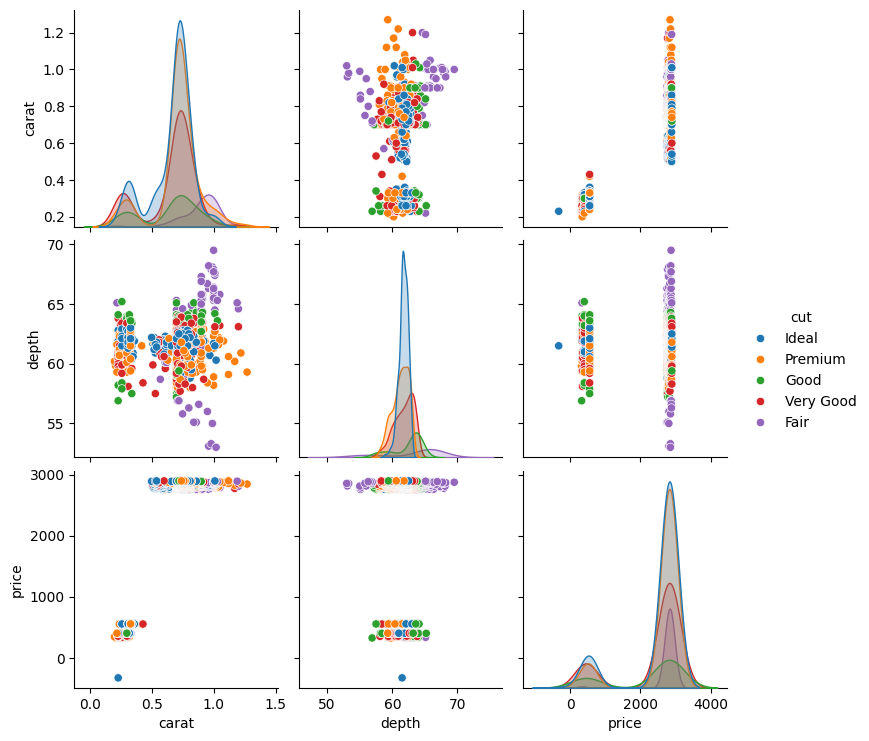

In [113]:
sns.pairplot(df, hue='cut', vars=["carat", "depth", "price"])


### Relationships Between Variables:

Carat vs. Depth:
- No strong linear relationship between carat and depth
- Depth values remain fairly consistent (55-65%) across different carat sizes
- Fair cut diamonds (purple) seem to have more variation in depth

Carat vs. Price:
- Strong positive relationship: as carat size increases, price increases

Depth vs. Price:
- No clear relationship between depth and price

In [114]:
df.select_dtypes(include=[np.number]).lt(0).sum()

idx      0
carat    0
depth    0
table    0
price    1
x        2
y        0
z        1
dtype: int64

In [115]:
# Set the variables that are negative to null values
df.loc[df['price'] < 0, 'price'] = np.nan
df.loc[df['x'] < 0, 'x'] = np.nan
df.loc[df['z'] < 0, 'z'] = np.nan

df.select_dtypes(include=[np.number]).lt(0).sum()

idx      0
carat    0
depth    0
table    0
price    0
x        0
y        0
z        0
dtype: int64

In [116]:
df.isna().sum()

idx        0
carat      0
cut        6
color      0
clarity    0
depth      0
table      0
price      8
x          6
y          3
z          1
dtype: int64

In [117]:
df = df.assign(
    cut=df['cut'].fillna(df['cut'].mode()[0]),
    price=df['price'].fillna(df['price'].mean()),
    x=df['x'].fillna(df['x'].mean()),
    y=df['y'].fillna(df['y'].mean()),
    z=df['z'].fillna(df['z'].mean())
)

df.isna().sum()

idx        0
carat      0
cut        0
color      0
clarity    0
depth      0
table      0
price      0
x          0
y          0
z          0
dtype: int64

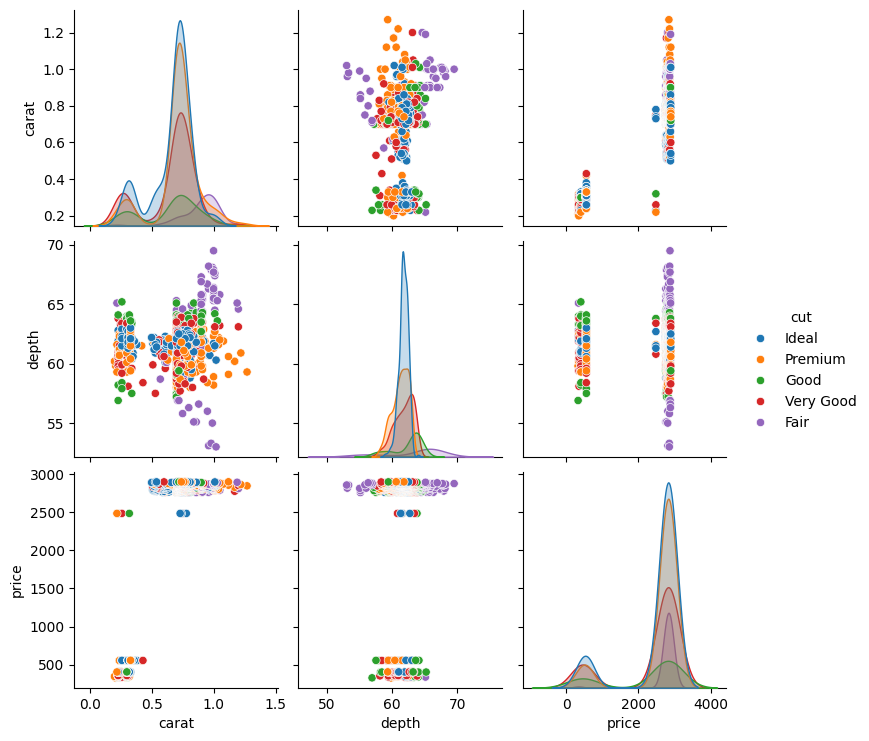

In [118]:
sns.pairplot(df, hue='cut', vars=["carat", "depth", "price"])
plt.savefig("fig.pdf")

In [119]:
df.clarity.value_counts()

clarity
SI1     306
VS2     217
VS1     159
SI2     153
VVS2     62
VVS1     58
I1       29
IF       14
vs2       1
si2       1
Name: count, dtype: int64

In [120]:
df.clarity = [x.upper() for x in df.clarity]
df.clarity.value_counts()

clarity
SI1     306
VS2     218
VS1     159
SI2     154
VVS2     62
VVS1     58
I1       29
IF       14
Name: count, dtype: int64

In [121]:
df['cut'].value_counts()

cut
Ideal        337
Premium      289
Very Good    224
Good          88
Fair          62
Name: count, dtype: int64

In [122]:
#encode variable cut as numeric value; create a new feature 'cut_num' as the numeric representation of 'cut'
le = preprocessing.LabelEncoder()
df['cut_num'] = le.fit_transform(df['cut'])
df['cut_num'] .value_counts()

cut_num
2    337
3    289
4    224
1     88
0     62
Name: count, dtype: int64

In [ ]:
#encode the variable cut_num as a one hot encoding value; set a new feature called cut_ohe
ohe = preprocessing.OneHotEncoder()
cut_ohe = ohe.fit_transform(df[['cut_num']]).toarray()
cut_ohe = pd.DataFrame(cut_ohe, columns = le.classes_)

df = pd.concat([df, cut_ohe], axis=1)
df.head()

,idx,carat,cut,color,clarity,depth,table,price,x,y,z,cut_num,Fair,Good,Ideal,Premium,Very Good
0,1,0.23,Ideal,E,SI2,61.5,55.0,2483.508065,3.95,5.602417,2.43,2,0.0,0.0,1.0,0.0,0.0
1,2,0.21,Premium,E,SI1,59.8,61.0,326.000000,3.89,3.840000,2.31,3,0.0,0.0,0.0,1.0,0.0
2,3,0.23,Good,E,VS1,56.9,65.0,327.000000,4.05,4.070000,2.31,1,0.0,1.0,0.0,0.0,0.0
3,4,0.29,Premium,I,VS2,62.4,58.0,334.000000,4.20,4.230000,2.63,3,0.0,0.0,0.0,1.0,0.0
4,5,0.31,Good,J,SI2,63.3,58.0,335.000000,4.34,4.350000,2.75,1,0.0,1.0,0.0,0.0,0.0


In [124]:
# Calculate a new feature called price_zscore as the standard Z-score of the feature price 
df['price_zscore'] = (df['price'] - df['price'].mean())/df['price'].std()
df['price_zscore'].head()

0    5.487378e-16
1   -2.603437e+00
2   -2.602231e+00
3   -2.593784e+00
4   -2.592577e+00
Name: price_zscore, dtype: float64

<Axes: >

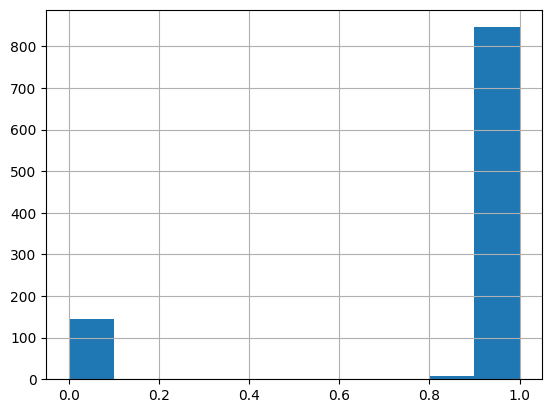

In [ ]:
#Calculate a new feature called price_min_max as the min max scaling of the feature price; check its range visualizing as a histogram
df['price_min_max'] = (df['price'] - df['price'].min())/(df['price'].max() - df['price'].min())
df['price_min_max'].head()

df['price_min_max'].hist()